## GMPR

In [57]:
from functools import partial
import multiprocessing

def gmpr_size_factor(col, ar):
    """Generate GMPR size factor

    Args:
        col (int): columm index of the numpy array
        ar (numpy array): numpy array of TAXID counts,
            colums as Samples, Rows as TAXIDs
    Returns:
        float: GMPR size factor per column
    """
    pr = np.apply_along_axis(lambda x: np.divide(ar[:, col], x), 0, ar)
    pr[np.isinf(pr)] = np.nan
    pr[pr == 0] = np.nan
    pr_median = np.nanmedian(pr, axis=0)
    return(np.exp(np.mean(np.log(pr_median))))


def GMPR_normalize(df, process):
    """Compute GMPR normalization
    Args:
        df (pandas Dataframe): TAXID count dataframe,
            colums as Samples, Rows as TAXIDs
        process (int): number of process for parallelization
    """
    ar = np.asarray(df)

    gmpr_sf_partial = partial(gmpr_size_factor, ar=ar)
    with multiprocessing.Pool(process) as p:
        sf = p.map(gmpr_sf_partial, list(range(np.shape(ar)[1])))

    return(pd.DataFrame(np.divide(ar, sf), index=df.index, columns=df.columns).dropna(axis=1))


In [58]:
import pandas as pd
import numpy as np

# Existing dataframe
df = pd.DataFrame({
    'A': [0, 1, 2, 300, 4, 5, 0, 7, 8, 9],
    'B': [10, 2212, 30, 40, 0, 60, 70, 8879, 90, 100],
    'C': [100, 200, 0, 4, 500, 600, 700, 800, 9, 1000],
   # 'D': np.random.randint(0, 100001, size=10),
})

print(df)

# df = df.set_index('A')
gdf = GMPR_normalize(df, 1)

     A     B     C
0    0    10   100
1    1  2212   200
2    2    30     0
3  300    40     4
4    4     0   500
5    5    60   600
6    0    70   700
7    7  8879   800
8    8    90     9
9    9   100  1000


/tmp/ipykernel_551613/3666861849.py:14: RuntimeWarning: invalid value encountered in divide
  pr = np.apply_along_axis(lambda x: np.divide(ar[:, col], x), 0, ar)
/tmp/ipykernel_551613/3666861849.py:14: RuntimeWarning: divide by zero encountered in divide
  pr = np.apply_along_axis(lambda x: np.divide(ar[:, col], x), 0, ar)


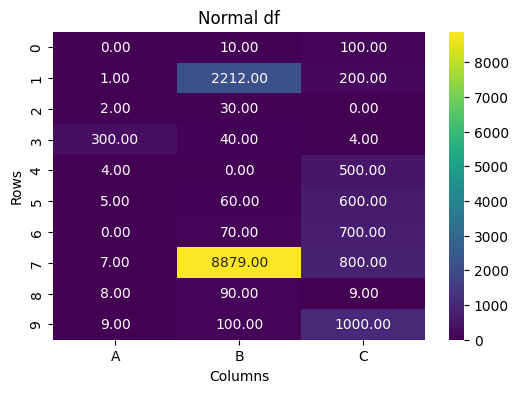

In [59]:
# Create the heatmap
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(df, annot=True, cmap='viridis', fmt='.2f')

# Customize the plot
plt.title('Normal df')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


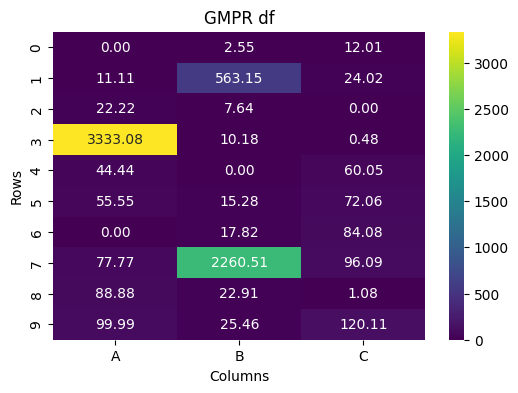

In [60]:
# Create the heatmap
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(gdf, annot=True, cmap='viridis', fmt='.2f')

# Customize the plot
plt.title('GMPR df')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


## TSNE

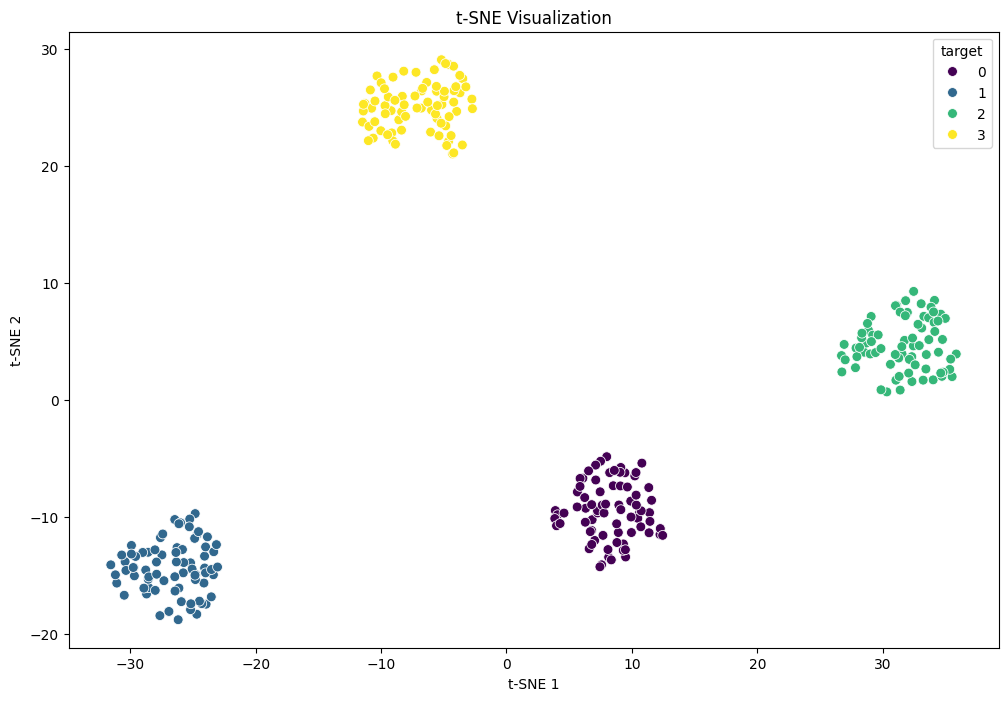

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X)

# Create a DataFrame
df = pd.DataFrame(Y, columns=['t-SNE 1', 't-SNE 2'])
df['target'] = y

# Plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='t-SNE 1', y='t-SNE 2', hue='target', palette='viridis', s=50)
plt.title('t-SNE Visualization')
plt.show()


In [87]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Given data
columns = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(
    [
        [1, 2, 3, 100, 200], 
        [2, 1, 1, 1, 300], 
        [3, 2,2, 200, 1],
        [4, 2, 3, 100, 201], 
        [5, 2, 1, 1, 300], 
    ], columns=columns)
df = df.set_index('a')
df

,b,c,d,e
a,,,,
1,2,3,100,200
2,1,1,1,300
3,2,2,200,1
4,2,3,100,201
5,2,1,1,300


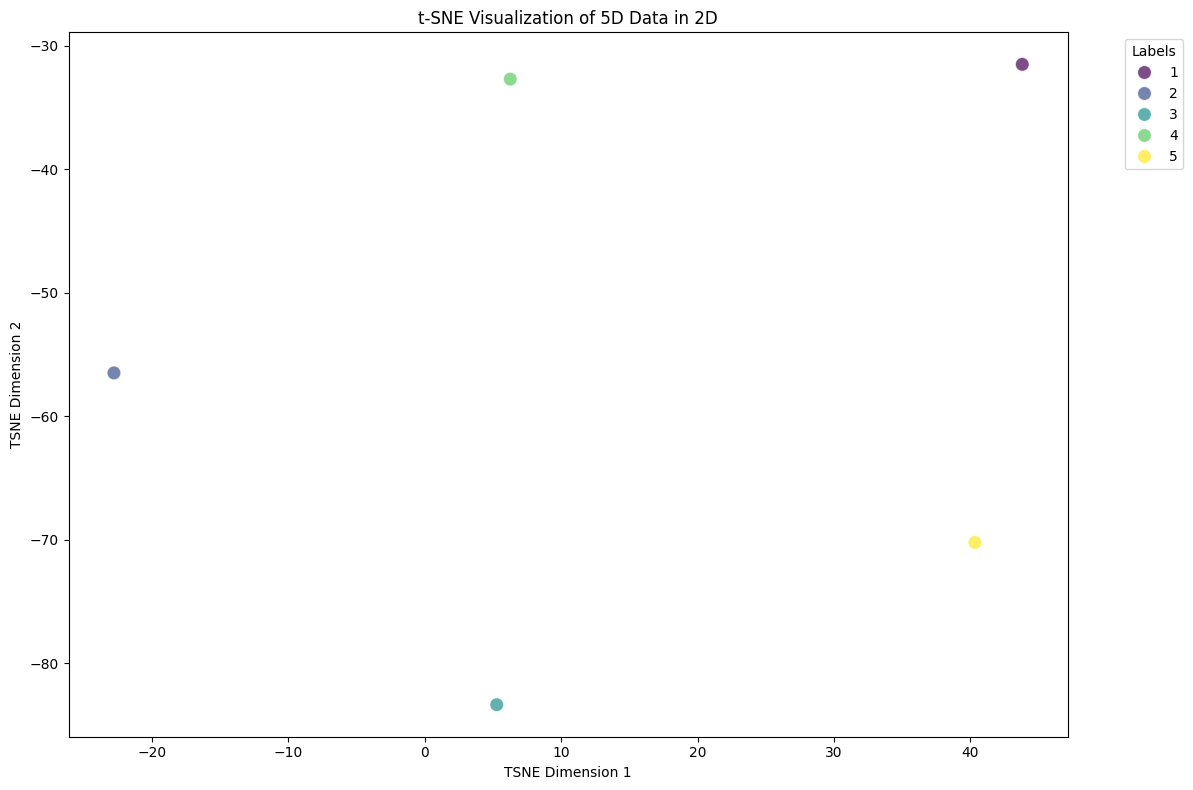

In [89]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
result = tsne.fit_transform(df.values)

# Create a new DataFrame with PC1 and PC2 columns
df_tsne = pd.DataFrame(result, columns=['PC1', 'PC2'])
df_tsne['labels'] = df.index.tolist()

# Create the scatter plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='PC1', y='PC2', hue='labels', palette='viridis', s=100, alpha=0.7)

plt.title('t-SNE Visualization of 5D Data in 2D')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## KNN

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.where(X[:, 0] > X[:, 1], 1, 0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)

# Example usage with new data
new_data = np.array([[0.5, 0.3], [0.7, 0.8]])
new_data_scaled = scaler.transform(new_data)
prediction = knn.predict(new_data_scaled)
print("\nPrediction for new data:", prediction)


Accuracy: 0.97
Confusion Matrix:
[[17  0]
 [ 1 12]]

Prediction for new data: [1 0]


/home/anand/miniforge3/envs/bio3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/anand/miniforge3/envs/bio3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

    t-SNE 1   t-SNE 2  target
0 -6.682544 -8.968862       1
1 -2.040675  4.209876       0
2 -6.967754 -8.955242       1
3 -1.351114  4.759322       0
4 -0.574708  4.434612       0
Accuracy: 1.00
Confusion Matrix:
[[14  0  0]
 [ 0 10  0]
 [ 0  0  6]]


/home/anand/miniforge3/envs/bio3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


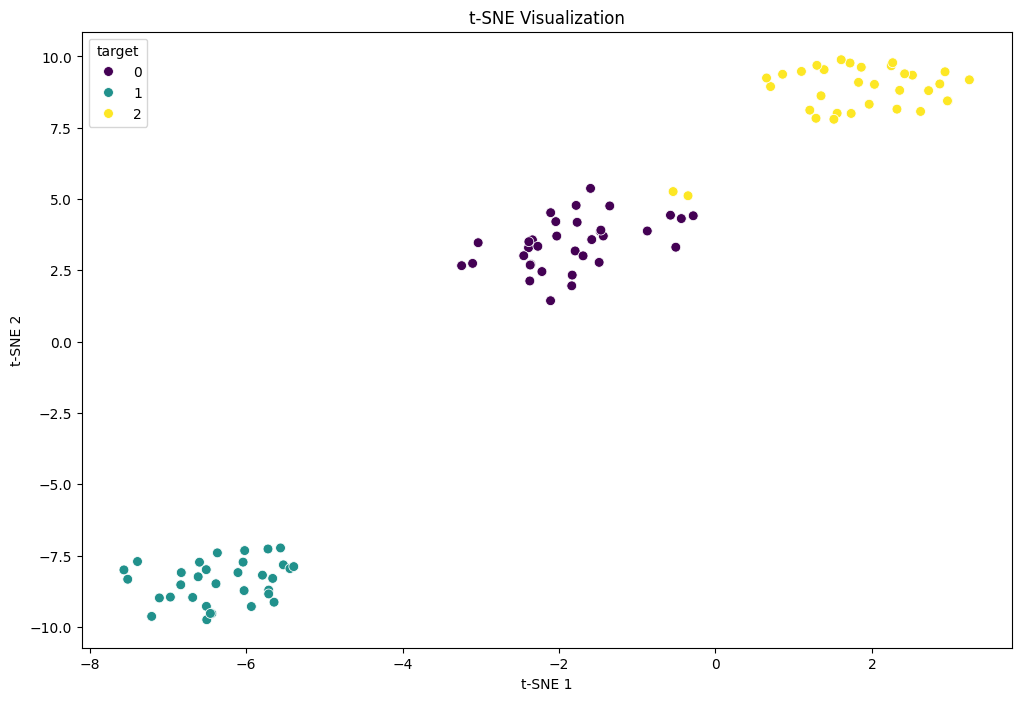


Prediction for new data: [2 2]


/home/anand/miniforge3/envs/bio3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X)

# Create a DataFrame
df = pd.DataFrame(Y, columns=['t-SNE 1', 't-SNE 2'])
df['target'] = y

print(df.head())

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['t-SNE 1', 't-SNE 2']], df['target'], test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)

# Plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='t-SNE 1', y='t-SNE 2', hue='target', palette='viridis', s=50)
plt.title('t-SNE Visualization')
plt.show()

# Example usage with new data
new_data = np.array([[30, 10], [31, 11]])
new_data_scaled = scaler.transform(new_data)
prediction = knn.predict(new_data_scaled)
print("\nPrediction for new data:", prediction)
